In [1]:
%run ./tooling/utils.py

/home/ubuntu/speech-first-modeling/src/speech_first_modeling/utils.py:176: UserWarning: registration of accessor <class '__main__.PandasSpeechFirst'> under name 'sf' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("sf")


In [2]:
%run ./tooling/cv.py # group k fold

In [3]:
%run ./tooling/dataset.py

In [4]:
%run ./tooling/plot.py

/home/ubuntu/speech-first-modeling/src/speech_first_modeling/utils.py:176: UserWarning:

registration of accessor <class 'utils.PandasSpeechFirst'> under name 'sf' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.



In [5]:
%run ./tooling/speech_model.py

2021-03-15 13:00:42,867 - tensorflow - WARNING - From /home/ubuntu/speech-first-modeling/src/speech_first_modeling/speech_model.py:29: The name tf.random.set_random_seed is deprecated. Please use tf.compat.v1.random.set_random_seed instead.

2021-03-15 13:00:42,869 - tensorflow - WARNING - 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


In [6]:
import ipywidgets as widgets

# Data Prep

In [7]:
%reload_kedro

/home/ubuntu/speech-first-modeling/src/speech_first_modeling/utils.py:176: UserWarning:

registration of accessor <class 'speech_first_modeling.utils.PandasSpeechFirst'> under name 'sf' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.



2021-03-15 13:00:47,752 - root - INFO - ** Kedro project speech-first-modeling
2021-03-15 13:00:47,755 - root - INFO - Defined global variable `context` and `catalog`


In [215]:
%run ./tooling/speech_commands.py

TRAIN_LIMIT = 100
TEST_LIMIT = 100

# All speech command samples are taken as negative samples
sc_df = SpeechCommandsDataset.load(context, load_audio=False, stage=DatasetStage.RAW, shuffle=True, limit=TRAIN_LIMIT + TEST_LIMIT)
print(f'Imported {len(sc_df)} negative samples')
sc_df['is_negative'] = True
sc_df['dataset'] = SpeechCommandsDataset.NAME

sc_train_df = sc_df.iloc[0:TRAIN_LIMIT]
sc_test_df = sc_df.iloc[TRAIN_LIMIT:]

Files selected: 200/105835 (0.19%)
/home/ubuntu/speech-first-modeling/data/01_raw/speech_commands/no/d070ea86_nohash_0.wav
Imported 200 negative samples


In [218]:
%run ./tooling/fsd50k.py
    
TRAIN_LIMIT = 800
TEST_LIMIT = 2000

# All speech command samples are taken as negative samples
fsd50k_train_df = Fsd50kDataset.load(context, load_audio=False, stage=DatasetStage.RAW, shuffle=True, limit=TRAIN_LIMIT + TEST_LIMIT)
print(f'Imported {len(fsd50k_df)} negative samples')
fsd50k_df['is_negative'] = True
fsd50k_df['dataset'] = Fsd50kDataset.NAME

fsd50k_train_df = fsd50k_df.iloc[0:TRAIN_LIMIT]
fsd50k_test_df = fsd50k_df.iloc[TRAIN_LIMIT:]

Files selected: 2800/40966 (6.83%)
/home/ubuntu/speech-first-modeling/data/01_raw/FSD50K/FSD50K.dev_audio/149043.wav
Imported 800 negative samples


In [219]:
%run ./tooling/fsdnoisy18k.py
    
TRAIN_LIMIT = 800
TEST_LIMIT = 2000

# All speech command samples are taken as negative samples
fsdnoisy18k_df = FsdNoisy18kDataset.load(context, load_audio=False, stage=DatasetStage.RAW, shuffle=True, limit=TRAIN_LIMIT + TEST_LIMIT)
print(f'Imported {len(fsdnoisy18k_df)} negative samples')
fsdnoisy18k_df['is_negative'] = True
fsdnoisy18k_df['dataset'] = FsdNoisy18kDataset.NAME

fsdnoisy18k_train_df = fsdnoisy18k_df.iloc[0:TRAIN_LIMIT]
fsdnoisy18k_test_df = fsdnoisy18k_df.iloc[TRAIN_LIMIT:]

Files selected: 2800/17585 (15.92%)
/home/ubuntu/speech-first-modeling/data/01_raw/FSDnoisy18k/FSDnoisy18k.audio_train/251077.wav
Imported 2800 negative samples


In [220]:
%run ./tooling/common_voice.py
    
TRAIN_LIMIT = 1000
TEST_LIMIT = 1000

# All speech command samples are taken as negative samples
cv_df = CommonVoiceDataset.load(context, load_audio=False, stage=DatasetStage.RAW, shuffle=True, limit=TRAIN_LIMIT + TEST_LIMIT)
print(f'Imported {len(cv_df)} negative samples')
cv_df['is_negative'] = True
cv_df['dataset'] = CommonVoiceDataset.NAME

cv_train_df = cv_df.iloc[0:TRAIN_LIMIT]
cv_test_df = cv_df.iloc[TRAIN_LIMIT:]

Files selected: 2000/1514322 (0.13%)
/home/ubuntu/speech-first-modeling/data/01_raw/common_voice/en/wav/common_voice_en_477879.wav
Imported 2000 negative samples


In [221]:
%run ./tooling/ah_consonants_ah.py
ah_df = AhConsonantsAhDataset.load(context, load_audio=False, stage=DatasetStage.TRIMMED, limit=None)
ah_df['dataset'] = AhConsonantsAhDataset.NAME

counts = ah_df['sound_name'].value_counts()
print(counts)
max_min_samples = counts[0]
MIN_N = widgets.IntSlider(min=0,max=max_min_samples,step=1,value=100, description='Min samples per sound:')
display(MIN_N)

Files selected: 2807/2807 (100.00%)
t                   387
p                   385
b                   371
k                   342
d                   328
g                   287
m                   283
n                   184
f                    39
v                    32
s                    25
z                    23
ing                  18
tha_voiceless_th     14
tha_voiced_th        12
sh                   12
j                    11
r                    10
h                    10
zh                   10
y                     9
l                     9
ch                    6
Name: sound_name, dtype: int64


IntSlider(value=100, description='Min samples per sound:', max=387)

In [222]:
# Every sound with less than MIN_N examples is not included in the positive labels
ah_df.loc[(ah_df['sound_name'].isin(counts[counts < MIN_N.value].keys())), 'is_negative'] = True
ah_df['is_negative'] = ah_df['is_negative'].fillna(False)

In [224]:
df = pd.concat([
    sc_train_df, 
    fsd50k_train_df, 
    fsdnoisy18k_train_df,
    cv_train_df, 
    ah_df
])

test_df = pd.concat([
    sc_test_df, 
    fsd50k_test_df, 
    fsdnoisy18k_test_df,
    cv_test_df, 
])
test_df['target'] = 'negative'

if 'is_negative' in df.columns:
    df['is_negative'].value_counts()

In [226]:
# Load WAVs
df['audio'] = df['local_filepath'].apply(load_wav)
test_df['audio'] = test_df['local_filepath'].apply(load_wav)
for f in list(df[df['audio'].isna()]['local_filepath']):
    if f:
        os.remove(f)
        print('Removed: ', f)
for f in list(test_df[test_df['audio'].isna()]['local_filepath']):
    if f:
        os.remove(f)
        print('Removed: ', f)
    
no_audio_idxs = list(df[df['audio'].isna()].index)
print('Dropped: ', no_audio_idxs)
df = df.drop(no_audio_idxs)

no_audio_idxs = list(test_df[test_df['audio'].isna()].index)
print('Dropped: ', no_audio_idxs)
test_df = test_df.drop(no_audio_idxs)

Removed:  /home/ubuntu/speech-first-modeling/data/01_raw/common_voice/en/wav/common_voice_en_669210.wav
Removed:  /home/ubuntu/speech-first-modeling/data/01_raw/common_voice/en/wav/common_voice_en_68043.wav
Dropped:  []
Dropped:  [1443, 1937]


In [228]:
print(df['audio'].apply(lambda x: np.isfinite(x).all()).value_counts())
print(test_df['audio'].apply(lambda x: np.isfinite(x).all()).value_counts())

True    5507
Name: audio, dtype: int64
True    3096
Name: audio, dtype: int64


In [229]:
df['audio_len'] = df['audio'].apply(lambda x: len if type(x) == list else None)
df[(df['audio_len'] == 0) | (df['audio_len'] == np.nan)]

Empty DataFrame
Columns: [local_filepath, s3_filepath, filepath, filename, sample_name, sound_name, group, is_negative, dataset, audio, audio_len]
Index: []

In [230]:
positive_labels = list(df[~df['is_negative']]['sound_name'].unique())
print(df['is_negative'].value_counts(dropna=False))

print('Postive labels', positive_labels)

True     2940
False    2567
Name: is_negative, dtype: int64
Postive labels ['p', 't', 'n', 'k', 'd', 'g', 'b', 'm']


In [231]:
df['sound_name'].value_counts(normalize=False).astype(str) + ' (' + df['sound_name'].value_counts(normalize=True).astype(str) + ')'

negative            2600 (0.47212638460141637)
t                    387 (0.07027419647721082)
p                    385 (0.06991102233520974)
b                    371 (0.06736880334120211)
k                   342 (0.062102778282186306)
d                    328 (0.05956055928817868)
g                    287 (0.05211548937715635)
m                   283 (0.051389141093154164)
n                    184 (0.03341202106410024)
f                   39 (0.0070818957690212455)
v                    32 (0.005810786272017432)
s                    25 (0.004539676775013619)
z                     23 (0.00417650263301253)
ing                 18 (0.0032685672780098057)
tha_voiceless_th     14 (0.002542218994007627)
sh                   12 (0.002179044852006537)
tha_voiced_th        12 (0.002179044852006537)
j                   11 (0.0019974577810059923)
h                   10 (0.0018158707100054477)
zh                  10 (0.0018158707100054477)
r                   10 (0.0018158707100054477)
l            

In [232]:
%%time
embedding_model_url = "https://tfhub.dev/google/speech_embedding/1"
speech_embedding_model = TfHubWrapper(embedding_model_url)

2021-03-15 15:40:37,050 - tensorflow - INFO - Saver not created because there are no variables in the graph to restore
Embedding model loaded, embedding shape: (?, ?, 1, 96)
CPU times: user 2.16 s, sys: 224 ms, total: 2.39 s
Wall time: 2.39 s


In [233]:
df[df['sound_name'].isin(positive_labels)]['sound_name'].value_counts()

t    387
p    385
b    371
k    342
d    328
g    287
m    283
n    184
Name: sound_name, dtype: int64

In [234]:
df['target'] = df['is_negative'].apply(lambda x: 'positive' if x is False else 'negative')
df['target'].value_counts()
positive_labels = ['positive']

In [235]:

total_positive_count = sum(df[df['target'].isin(positive_labels)]['target'].value_counts())
max_positive_count = df[df['target'].isin(positive_labels)]['target'].value_counts()[0]
max_negative_count = len(df[~df['target'].isin(positive_labels)])
POSITIVE_COUNT = widgets.IntSlider(min=10,max=max_positive_count,step=1,value=max_positive_count, description='Pos. count:')
# how many more negatives compared to non-negatives (e.g. if positive_count = 100, neg_mult = 2, we will have 200 negatives)

display(POSITIVE_COUNT)

max_negative_multiplier = max(1, max_negative_count/max_positive_count)
NEGATIVE_MULTIPLIER = widgets.FloatSlider(min=1,max=max_negative_multiplier,step=0.01,value=max_negative_multiplier, description='Neg. mult:') 

REBALANCE = widgets.Checkbox(
    value=True,
    description='Rebalance?',
    indent=False
)
LABELED_WEIGHT = widgets.IntSlider(min=1,max=max(25, df[~df['is_negative']]['sound_name'].nunique()),step=1,value=1, description='Labeled weight:')
NEGATIVES_WEIGHT = widgets.IntSlider(min=0,max=25,step=1,value=1, description='Neg. weight:')

display(NEGATIVE_MULTIPLIER)
display(REBALANCE)
display(LABELED_WEIGHT)
display(NEGATIVES_WEIGHT)

IntSlider(value=2567, description='Pos. count:', max=2567, min=10)

FloatSlider(value=1.1453058044409816, description='Neg. mult:', max=1.1453058044409816, min=1.0, step=0.01)

Checkbox(value=True, description='Rebalance?', indent=False)

IntSlider(value=1, description='Labeled weight:', max=25, min=1)

IntSlider(value=1, description='Neg. weight:', max=25)

In [236]:
%run ./tooling/speech_model.py
use_groups=True
with_filepath=True
context_size=16

all_data_edfl = prep_data(df, target_col='target', positive_labels=['positive'], speech_embedding_model=speech_embedding_model, use_groups=use_groups, label_max=POSITIVE_COUNT.value, negative_multiplier=NEGATIVE_MULTIPLIER.value)
if REBALANCE.value:
    all_data_edfl.full_rebalance(negatives=NEGATIVES_WEIGHT.value, labeled=LABELED_WEIGHT.value)
filter_fn = get_filter_fn(context_size=context_size)
print('-')
all_data = all_data_edfl.get_all_data_shuffled(filter_fn, use_groups=use_groups, with_filepath=with_filepath)
input_df = pd.DataFrame(all_data, columns=['X', 'y'] + (['group'] if use_groups else []) + (['filepath'] if with_filepath else []))
input_df['broken'] = input_df['X'].apply(lambda x: not np.isfinite(x).all())
input_df = input_df.drop(input_df[input_df['broken']].index).drop('broken', axis=1).reset_index(drop=True)
labels = all_data_edfl.labels

# Print label counts
label_idx_to_label_map = dict(zip(range(len(labels)), labels))
print(input_df['y'].apply(lambda x: label_idx_to_label_map[x]).value_counts())
print(input_df['y'].apply(lambda x: 'negative' if label_idx_to_label_map[x] == 'negative' else 'positive').value_counts())

TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


loading 5507 examples
Rebalanced positive: 2,567 -> 2,939 samples
-
negative    2940
positive    2939
Name: y, dtype: int64
negative    2940
positive    2939
Name: y, dtype: int64


In [240]:
%run ./tooling/speech_model.py
use_groups=True
with_filepath=True
context_size=16

test_data_edfl = prep_data(test_df, target_col='target', positive_labels=[], speech_embedding_model=speech_embedding_model)
filter_fn = get_filter_fn(context_size=context_size)
print('-')
all_test_data = test_data_edfl.get_all_data_shuffled(filter_fn, use_groups=use_groups, with_filepath=with_filepath)
test_input_df = pd.DataFrame(all_test_data, columns=['X', 'y'] + (['group'] if use_groups else []) + (['filepath'] if with_filepath else []))
test_input_df['broken'] = test_input_df['X'].apply(lambda x: not np.isfinite(x).all())
test_input_df = test_input_df.drop(test_input_df[test_input_df['broken']].index).drop('broken', axis=1).reset_index(drop=True)
# labels = test_data_edfl.labels

# Print label counts
label_idx_to_label_map = dict(zip(range(len(labels)), labels))
print(test_input_df['y'].apply(lambda x: label_idx_to_label_map[x]).value_counts())
print(test_input_df['y'].apply(lambda x: 'negative' if label_idx_to_label_map[x] == 'negative' else 'positive').value_counts())

TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


loading 1000 examples
-
negative    1000
Name: y, dtype: int64
negative    1000
Name: y, dtype: int64


# Modeling

In [241]:
# @markdown **epochs_per_test** and **train_test_loops** control how long the
# @markdown the model is trained. An epoch is defined as the model having seen
# @markdown each example at least once, with some examples twice to ensure the
# @markdown correct labeled / negatives balance.

EPOCHS = widgets.IntSlider(min=1,max=25,step=1,value=1, description='Epochs:')
LOOPS = widgets.IntSlider(min=0,max=50,step=1,value=15, description='Loops:')
ACTIVATION_FN = widgets.ToggleButtons(
    options=['softmax', 'sigmoid'],
    description='Activation FN:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Softmax', 'Sigmoid'],
#     icons=['check'] * 3
)

display(ACTIVATION_FN)
display(EPOCHS)
display(LOOPS)

ToggleButtons(description='Activation FN:', options=('softmax', 'sigmoid'), tooltips=('Softmax', 'Sigmoid'), v…

IntSlider(value=1, description='Epochs:', max=25, min=1)

IntSlider(value=15, description='Loops:', max=50)

Highest test accuracy: 80.96%.


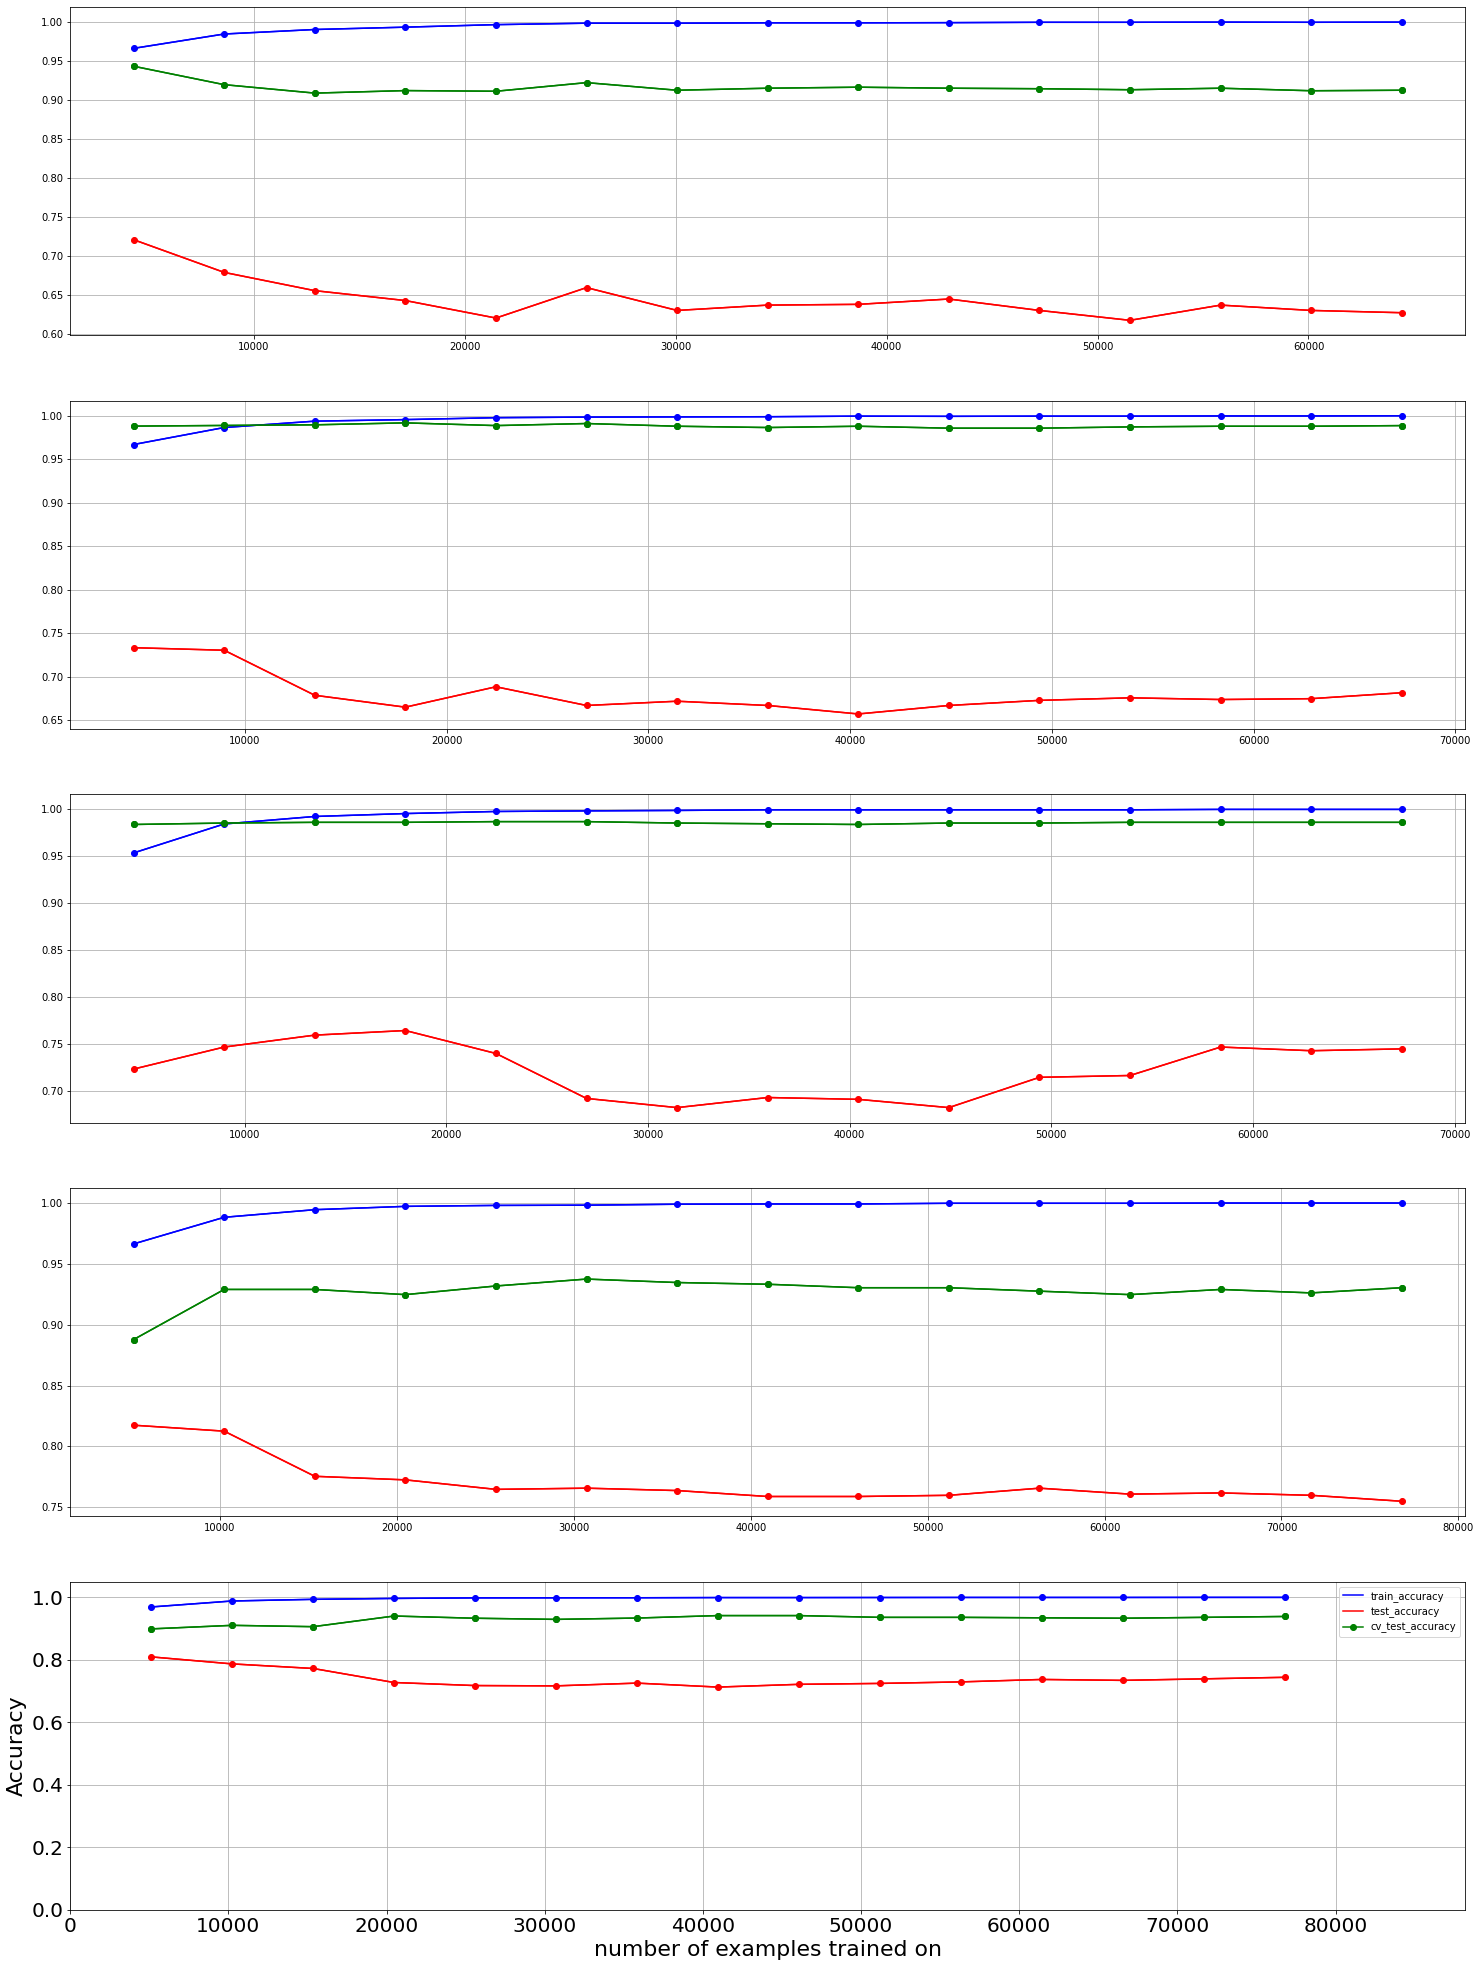

In [257]:
%run ./tooling/speech_model.py

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

epochs = EPOCHS.value
loops = LOOPS.value
activation_fn = ACTIVATION_FN.value

# @title Run training and evaluation
head_model = "Convolutional"  # @param ["Convolutional", "Fully_Connected"] {type:"string"}
# @markdown Suggested **learning_rate** range 0.00001 - 0.01.
learning_rate = 0.001  # @param {type:"number"}
batch_size = 32


if head_model == "Convolutional":
    model_fn = functools.partial(_conv_head_model_fn, context=context_size)
else:
    model_fn = _fully_connected_model_fn
    
tf_metrics = ['accuracy']

negatives_multiplier =  0#@param {type:"integer"} # 25

progress_bar = IPython.display.display(progress(0, 100), display_id=True)

cv = RepeatedStratifiedGroupKFold(n_splits=5, n_repeats=1, random_state=42)
fig, axs = plt.subplots(cv.get_n_splits(), figsize=(25, 35))

all_test_tf_results = []
idx_to_label_map = dict(enumerate(labels))

all_scores = []
all_cv_scores = []
all_preds = []
all_cv_preds = []
all_preds_mapped = []
all_cv_preds_mapped = []
all_labels = []
all_cv_labels = []
all_labels_mapped = []
all_cv_labels_mapped = []
for split_idx, (train_index, test_index) in enumerate(cv.split(input_df['X'], input_df['y'], groups=input_df['group'])):
    data_trained_on = 0
    data = []

    train_tf_results = collections.defaultdict(list)
    test_tf_results = collections.defaultdict(list)
    cv_test_tf_results = collections.defaultdict(list)
    
    # Make sure there is no group overlap
    group_overlap = set(input_df.iloc[train_index]['group']).intersection(input_df.iloc[test_index]['group'])
    assert len(group_overlap) == 0, f'Group overlap: {len(group_overlap)}'
    
    train_data = input_df.iloc[train_index][['X', 'y']]
    cv_test_data = input_df.iloc[test_index].drop_duplicates('filepath')[['X', 'y']]
    test_data = test_input_df[['X', 'y']]
        
    trainer = HeadTrainer(model_fn=model_fn,
                      input_shape=[context_size, 1, 96],
                      targets=labels,
                      head_learning_rate=learning_rate,
                      batch_size=batch_size,
                      metrics=tf_metrics,
                      activation_fn = activation_fn)
    
    for loop in range(loops):
        max_data = len(input_df) * epochs * loops + 10

        ### TRAIN ###
        train_out = trainer.epoch_train(train_data, epochs=epochs)

        print(loop)
        # train metrics
        train_loss = train_out[0]
        epoch_tf_metrics = train_out[1:]
        for idx, metric in enumerate(tf_metrics):
            train_tf_results[metric].append(epoch_tf_metrics[idx])
        
        # test metrics
        test_out = trainer.test(test_data)
        cv_test_out = trainer.test(cv_test_data)
        test_loss = test_out[0]
        cv_test_loss = cv_test_out[0]
        test_tf_metrics = test_out[1:]
        cv_test_tf_metrics = cv_test_out[1:]
        for idx, metric in enumerate(tf_metrics):
            test_tf_results[metric].append(test_tf_metrics[idx])
            cv_test_tf_results[metric].append(cv_test_tf_metrics[idx])
        
        data_trained_on += len(train_data) * epochs
        data.append(data_trained_on)
        
        IPython.display.display(plt.gcf())
        print("Highest test accuracy: %.2f percent." % (100 * max(test_tf_results['accuracy'])))
        IPython.display.clear_output(wait=True)

    cv_preds = trainer.infer_all(cv_test_data)
    preds = trainer.infer_all(test_data)
    cv_preds_clf = [np.argmax(pred) for pred in cv_preds]
    preds_clf = [np.argmax(pred) for pred in preds]
    
    all_cv_labels.append(cv_test_data['y'])
    all_labels.append(test_data['y'])
    
    if activation_fn == 'softmax':
        scores = {
#             'roc_ovo': roc_auc_score(pd.get_dummies(test_data['y']), preds, multi_class='ovo'),
#             'roc_ovr': roc_auc_score(pd.get_dummies(test_data['y']), preds, multi_class='ovr'),
            'accuracy': accuracy_score(test_data['y'], preds_clf),
        }
        cv_scores = {
            'roc_ovo': roc_auc_score(pd.get_dummies(cv_test_data['y']), cv_preds, multi_class='ovo'),
            'roc_ovr': roc_auc_score(pd.get_dummies(cv_test_data['y']), cv_preds, multi_class='ovr'),
            'accuracy': accuracy_score(cv_test_data['y'], cv_preds_clf),
        }
    else:
        scores = {
            'accuracy': accuracy_score(test_data['y'], preds_clf),
        }
        cv_scores = {
            'accuracy': accuracy_score(cv_test_data['y'], cv_preds_clf),
        }
    all_scores.append(scores)
    all_cv_scores.append(cv_scores)
    
    labels_mapped = ([idx_to_label_map[l] for l in test_data['y']])
    cv_labels_mapped = ([idx_to_label_map[l] for l in cv_test_data['y']])
    
    preds_mapped = ([idx_to_label_map[p] for p in preds_clf])
    cv_preds_mapped = ([idx_to_label_map[p] for p in cv_preds_clf])
    
    all_labels_mapped.append(labels_mapped)
    all_cv_labels_mapped.append(cv_labels_mapped)
    
    all_preds_mapped.append(preds_mapped)
    all_cv_preds_mapped.append(cv_preds_mapped)
    
    all_preds.append(preds)
    all_cv_preds.append(cv_preds)
    
    plot_step(plt, max_data, data, train_tf_results, test_tf_results, cv_test_results=cv_test_tf_results, ax=axs[split_idx])
    
    all_test_tf_results.append(test_tf_results)
    print(f"Highest test accuracy: {(100 * max(test_tf_results['accuracy'])):.2f}%.")

In [188]:
for metric in tf_metrics:
    print(metric)
    final_metric_values = ([split_results[metric][-1] for split_results in all_test_tf_results])
    for split_idx, metric_value in enumerate(final_metric_values):
        print(f'Split {split_idx+1}: {metric_value*100:.2f}%')
    print(f'AVG={np.average(final_metric_values)*100:.2f}%')
    print(f'STD={np.std(final_metric_values)*100:.2f}%')
    print('-'*10)

accuracy
Split 1: 91.97%
Split 2: 98.81%
Split 3: 98.74%
Split 4: 90.39%
Split 5: 92.61%
AVG=94.50%
STD=3.56%
----------


In [189]:
agg_metrics = collections.defaultdict(list)

for split_idx, scores in enumerate(all_scores):
    print(f'Split {split_idx+1}')
    for metric, score in scores.items():
        agg_metrics[metric].append(score)
        print(f'{metric}: {score*100:.2f}%')
    print('-'*10)

print('Combined')
for metric in agg_metrics.keys():
    print(f'{metric}: {np.average(agg_metrics[metric])*100:.2f}% (STD: {np.std(agg_metrics[metric])*100:.2f}%)')

Split 1
roc_ovo: 99.77%
roc_ovr: 99.77%
accuracy: 91.87%
----------
Split 2
roc_ovo: 99.71%
roc_ovr: 99.71%
accuracy: 98.79%
----------
Split 3
roc_ovo: 99.51%
roc_ovr: 99.51%
accuracy: 98.73%
----------
Split 4
roc_ovo: 98.17%
roc_ovr: 98.17%
accuracy: 90.50%
----------
Split 5
roc_ovo: 97.08%
roc_ovr: 97.08%
accuracy: 92.27%
----------
Combined
roc_ovo: 98.85% (STD: 1.06%)
roc_ovr: 98.85% (STD: 1.06%)
accuracy: 94.43% (STD: 3.58%)


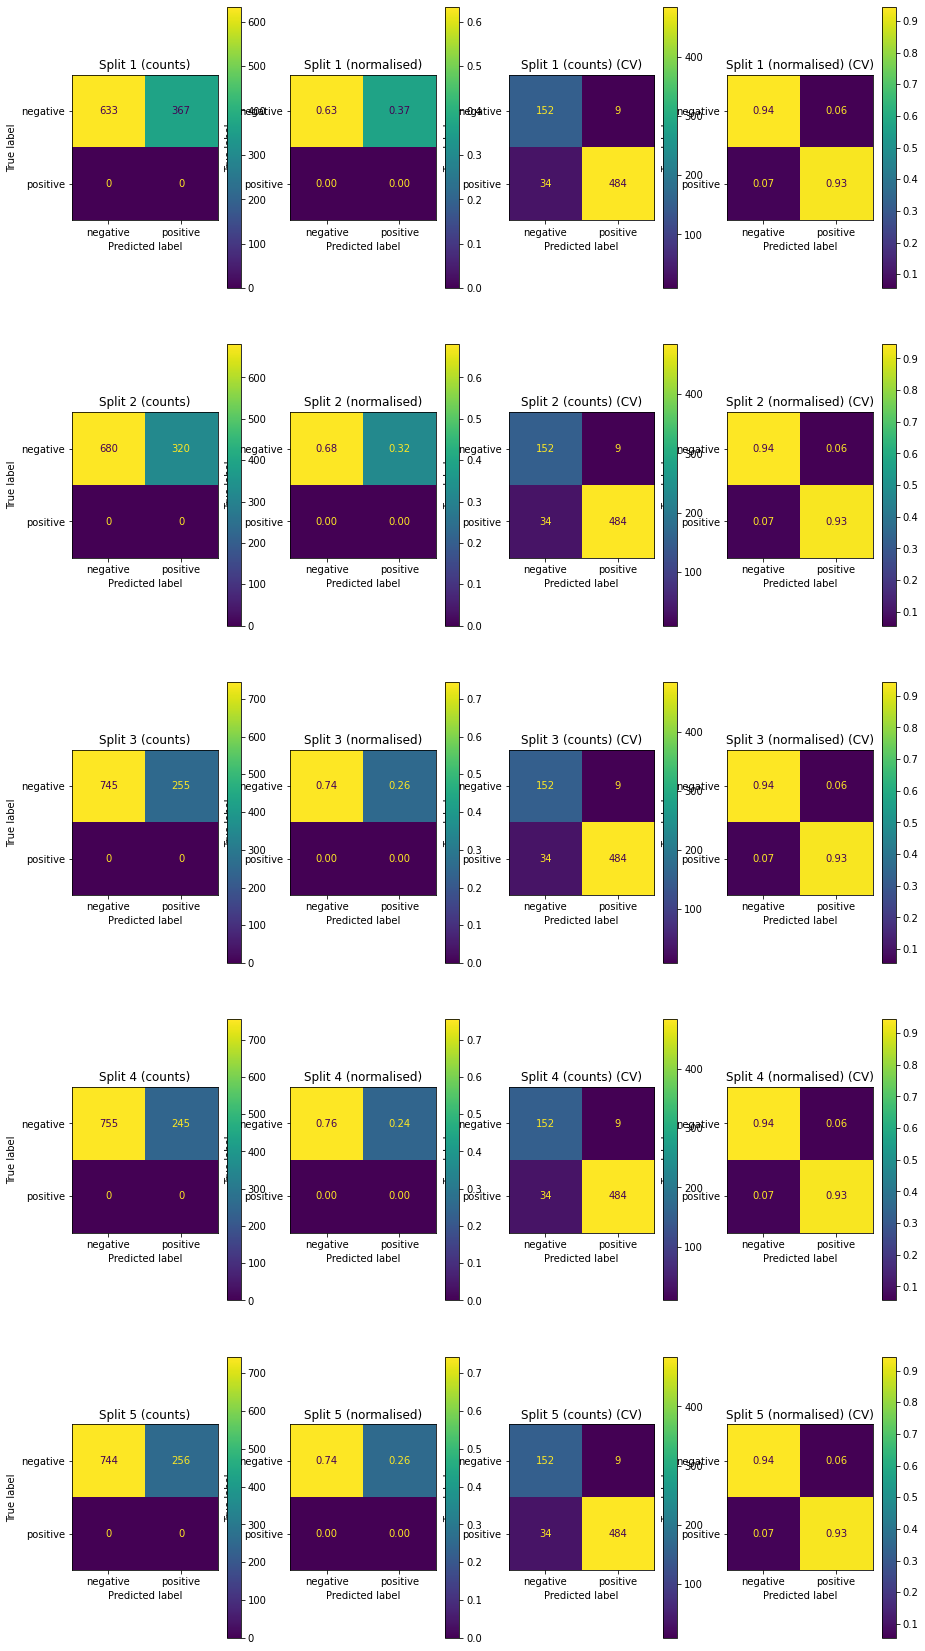

In [258]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(len(all_preds_mapped), 4, figsize=(15, 30))

for idx, (labels_mapped, preds_mapped, cv_labels_mapped, cv_preds_mapped) in enumerate(zip(all_labels_mapped, all_preds_mapped, all_cv_labels_mapped, all_cv_preds_mapped)):
    # Counts
    axs[idx][0].title.set_text(f'Split {idx+1} (counts)')
    
    cm = confusion_matrix(labels_mapped, preds_mapped, labels=labels, normalize=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)

    # Normalised
    axs[idx][1].title.set_text(f'Split {idx+1} (normalised)')
    disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='d', ax=axs[idx][0])
    
    cm = confusion_matrix(labels_mapped, preds_mapped, labels=labels, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)
    disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='.2f', ax=axs[idx][1])
    
    
    # Counts
    axs[idx][2].title.set_text(f'Split {idx+1} (counts) (CV)')
    
    cm = confusion_matrix(cv_labels_mapped, cv_preds_mapped, labels=labels, normalize=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)

    # Normalised
    axs[idx][3].title.set_text(f'Split {idx+1} (normalised) (CV)')
    disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='d', ax=axs[idx][2])
    
    cm = confusion_matrix(cv_labels_mapped, cv_preds_mapped, labels=labels, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)
    disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='.2f', ax=axs[idx][3])
    
plt.show()

In [259]:
len(all_cv_labels_mapped[0]), len(all_cv_preds_mapped[0])

(1516, 1516)

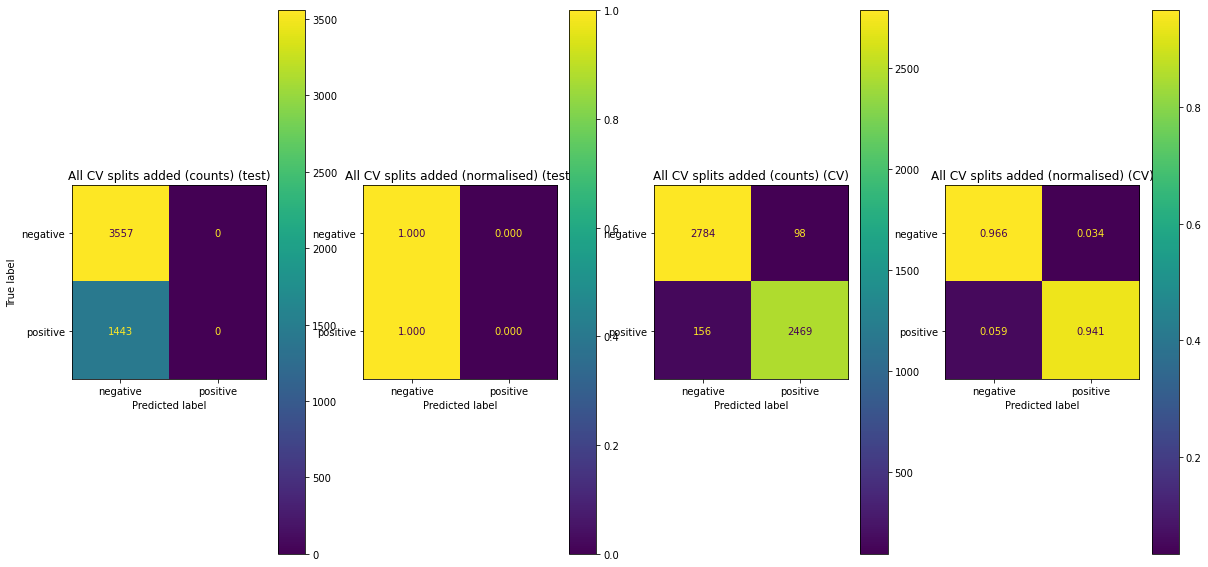

In [260]:
# Average
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].title.set_text(f'All CV splits added (counts) (test)')
cm = confusion_matrix([i for s in all_preds_mapped for i in s],
                      [i for s in all_labels_mapped for i in s], labels=labels, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

dsp = disp.plot(include_values=True, cmap='viridis', ax=axs[0], xticks_rotation='horizontal', values_format='d')

axs[1].title.set_text(f'All CV splits added (normalised) (test)')
cm = confusion_matrix([i for s in all_preds_mapped for i in s],
                      [i for s in all_labels_mapped for i in s], labels=labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

dsp = disp.plot(include_values=True, cmap='viridis', ax=axs[1], xticks_rotation='horizontal', values_format='.3f')

axs[2].title.set_text(f'All CV splits added (counts) (CV)')
cm = confusion_matrix([i for s in all_cv_preds_mapped for i in s],
                      [i for s in all_cv_labels_mapped for i in s], labels=labels, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

dsp = disp.plot(include_values=True, cmap='viridis', ax=axs[2], xticks_rotation='horizontal', values_format='d')

axs[3].title.set_text(f'All CV splits added (normalised) (CV)')
cm = confusion_matrix([i for s in all_cv_preds_mapped for i in s],
                      [i for s in all_cv_labels_mapped for i in s], labels=labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

dsp = disp.plot(include_values=True, cmap='viridis', ax=axs[3], xticks_rotation='horizontal', values_format='.3f')

In [192]:
all_pred_vals_mapped = [[{label: val for label, val in zip (labels, pred)} for pred in split_preds] for split_preds in all_preds]

In [193]:
%run ./tooling/utils.py
%run ./tooling/plot.py

# Prepare data that will be plotted
output_df = input_df.copy()
for split_idx, (train_index, test_index) in enumerate(cv.split(input_df['X'], input_df['y'], groups=input_df['group'])):
    test_index_dd = output_df.iloc[test_index].drop_duplicates('filepath').index
    output_df.loc[test_index_dd, f'clf'] = all_preds_mapped[split_idx]
    output_df.loc[test_index_dd, f'label'] = all_labels_mapped[split_idx]
    output_df.loc[test_index_dd, f'pred'] = all_pred_vals_mapped[split_idx]
output_df = output_df[output_df['pred'].notna()] # clean duplicates without predictions
output_df = output_df.join(pd.DataFrame(output_df.pop('pred').values.tolist()))

# output_df['session_id'] = output_df['filepath'].apply(lambda x: x.split('/')[-2])
output_df['filename'] = output_df['filepath'].apply(lambda x: x.split('/')[-1])
output_df['local_filepath'] = output_df['filepath']

group_mappings = dict(enumerate(all_data_edfl.groups))
output_df['group'] = output_df['group'].apply(lambda x: group_mappings[x])

/home/ubuntu/speech-first-modeling/src/speech_first_modeling/utils.py:176: UserWarning:

registration of accessor <class '__main__.PandasSpeechFirst'> under name 'sf' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.



In [194]:
output_df['label_pred'] = output_df.apply(lambda x: x[x.label], axis=1)

In [195]:
output_df['clf_pred'] = output_df.apply(lambda x: x[x.clf], axis=1)

In [196]:
output_df['gap'] = output_df['clf_pred'] - output_df['label_pred']

In [197]:
%run ./tooling/plot.py

# Discard removed samples first
plot_df = output_df.copy()
plot_df['file_exists'] = plot_df['filepath'].apply(os.path.exists)
plot_df = plot_df[plot_df['file_exists'] == True]
plot_embeddings(plot_df, 'X', 'label', dry=False, width=None, height=None, mode='inline', port=8050)

Dry run DISABLED


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

Exception in thread Thread-56:
Traceback (most recent call last):
  File "/home/ubuntu/miniconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/miniconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/retrying.py", line 212, in call
    raise attempt.get()
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/retrying.py", line 247, in get
    six.reraise(self.value[0], self.value[1], self.value[2])
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/six.py", line 703, in reraise
    raise value
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/retrying.py", line 200, in call
    attempt = Attempt(fn(*args, **kwargs), attempt_number, False)
  File "/home/ubuntu

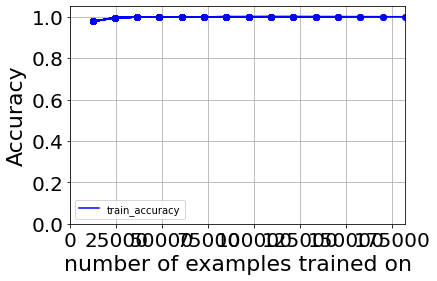

In [198]:
%run ./tooling/speech_model.py

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

head_model = "Convolutional"  # @param ["Convolutional", "Fully_Connected"] {type:"string"}
learning_rate = 0.001  # @param {type:"number"}
batch_size = 32
activation_fn = ACTIVATION_FN.value

epochs = EPOCHS.value  # @param {type:"slider", min:1, max:15, step:1}
loops = LOOPS.value

if head_model == "Convolutional":
    model_fn = functools.partial(_conv_head_model_fn, context=context_size)
else:
    model_fn = _fully_connected_model_fn
    
tf_metrics = ['accuracy']

progress_bar = IPython.display.display(progress(0, 100), display_id=True)

# fig, axs = plt.subplots(rskf.get_n_splits(), figsize=(25, 35))

all_test_tf_results = []
idx_to_label_map = dict(enumerate(labels))

all_scores = []
all_preds = []
all_preds_mapped = []
all_labels = []
all_labels_mapped = []

data_trained_on = 0
data = []

train_tf_results = collections.defaultdict(list)
test_tf_results = collections.defaultdict(list)

train_data = input_df[['X', 'y']]

trainer = HeadTrainer(model_fn=model_fn,
                  input_shape=[context_size, 1, 96],
                  targets=labels,
                  head_learning_rate=learning_rate,
                  batch_size=batch_size,
                  metrics=tf_metrics,
                  activation_fn=activation_fn)

for loop in range(loops):
    max_data = len(input_df) * epochs * loops + 10

    ### TRAIN ###
    train_out = trainer.epoch_train(train_data, epochs=epochs)

    # train metrics
    train_loss = train_out[0]
    epoch_tf_metrics = train_out[1:]
    for idx, metric in enumerate(tf_metrics):
        train_tf_results[metric].append(epoch_tf_metrics[idx])

    data_trained_on += len(train_data) * epochs
    data.append(data_trained_on)



    IPython.display.display(plt.gcf())
    IPython.display.clear_output(wait=True)
    plot_step(plt, max_data, data, train_tf_results, None)

In [199]:
head_model_module_dir = os.path.join(MODEL_PATH, f"anomaly_{head_model.lower()}_{activation_fn}")
print(head_model_module_dir)

/home/ubuntu/speech-first-modeling/data/06_models/anomaly_convolutional_softmax


In [200]:
# WARNING! This recursively deletes directories!
import shutil
print(head_model_module_dir)
try:
    shutil.rmtree(head_model_module_dir)
except:
    pass

trainer.save_head_model(head_model_module_dir)

/home/ubuntu/speech-first-modeling/data/06_models/anomaly_convolutional_softmax
2021-03-15 14:19:14,439 - absl - INFO - Exported TF-Hub module to: /home/ubuntu/speech-first-modeling/data/06_models/anomaly_convolutional_softmax


In [201]:
%run ./tooling/speech_model.py

full_model = FullModelWrapper(embedding_model_url, head_model_module_dir)

TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


2021-03-15 14:19:18,324 - tensorflow - INFO - Saver not created because there are no variables in the graph to restore
2021-03-15 14:19:18,587 - tensorflow - INFO - Saver not created because there are no variables in the graph to restore


In [202]:
full_model.targets

['negative', 'positive']

In [203]:
# Download using Jupyter download functionality
!tar -C {head_model_module_dir} -cvf {head_model_module_dir.split('/')[-1]}.tar.gz .
!echo {head_model_module_dir.split('/')[-1]}.tar.gz

./
./tfhub_module.pb
./targets.txt
./variables/
./variables/variables.index
./variables/variables.data-00000-of-00001
./assets/
./saved_model.pb
anomaly_convolutional_softmax.tar.gz


In [204]:
pred = full_model.infer(np.zeros((1,36000)))
pred

{'negative': 0.9602014422416687, 'positive': 0.0397985465824604}

In [205]:
# np.array([df.iloc[0]['audio']]
df['audio'].apply(lambda x: np.shape(x)[0]).min(), df['audio'].apply(lambda x: np.shape(x)[0]).max(),  df['audio'].apply(lambda x: np.shape(x)[0]).mean(),  df['audio'].apply(lambda x: np.shape(x)[0]).median()

(1434, 480000, 57492.636801713365, 21046.0)

In [206]:
np.zeros((1,32000))

array([[0., 0., 0., ..., 0., 0., 0.]])

In [207]:
df['dataset'].value_counts()

ah_consonants_ah    2805
common_voice        1098
FSDnoisy18k          800
FSD50K               800
speech_commands      100
Name: dataset, dtype: int64

In [208]:
# AH_CONSANTS_AH show predictions on a random sample
for row in df[df['dataset'] == 'ah_consonants_ah'].sample(10).itertuples():
    display(HTML(make_playable_wav(row.audio)))
    row_preds = full_model.infer(row.audio)
    sorted_preds = sorted(row_preds.items(), key=lambda x: x[1], reverse=True)
#     sound_name = row.sound_name if not row.is_negative else "negative"
    sound_name = row.target
    print(sound_name)
    print(sorted_preds[:3])
    print('✅' if sound_name == sorted_preds[0][0]  else '❌')
    print('---')

/home/ubuntu/miniconda3/lib/python3.6/site-packages/IPython/lib/display.py:173: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



positive
[('positive', 0.9990461468696594), ('negative', 0.000953857961576432)]
✅
---


positive
[('positive', 0.9822763800621033), ('negative', 0.017723549157381058)]
✅
---


positive
[('positive', 0.9984512329101562), ('negative', 0.0015486996853724122)]
✅
---


positive
[('positive', 0.9959879517555237), ('negative', 0.004012091550976038)]
✅
---


positive
[('positive', 0.9952497482299805), ('negative', 0.0047502778470516205)]
✅
---


positive
[('positive', 0.9995347261428833), ('negative', 0.00046528156963177025)]
✅
---


positive
[('positive', 0.9989381432533264), ('negative', 0.0010618478991091251)]
✅
---


positive
[('positive', 0.9245603680610657), ('negative', 0.07543965429067612)]
✅
---


positive
[('positive', 0.9940794706344604), ('negative', 0.0059205018915236)]
✅
---


positive
[('positive', 0.9946773052215576), ('negative', 0.005322689656168222)]
✅
---


In [209]:
# FSD50K show predictions on a random sample
for row in df[df['dataset'] == 'FSD50K'].sample(10).itertuples():
    display(HTML(make_playable_wav(row.audio)))
    row_preds = full_model.infer(row.audio)
    sorted_preds = sorted(row_preds.items(), key=lambda x: x[1], reverse=True)
    sound_name = row.sound_name if not row.is_negative else "negative"
    print(sound_name)
    print(sorted_preds[:3])
    print('✅' if sound_name == sorted_preds[0][0]  else '❌')
    print('---')

negative
[('positive', 0.9703834652900696), ('negative', 0.029616551473736763)]
❌
---


negative
[('negative', 0.997836172580719), ('positive', 0.0021638572216033936)]
✅
---


negative
[('negative', 0.9731930494308472), ('positive', 0.026806894689798355)]
✅
---


negative
[('negative', 0.983359694480896), ('positive', 0.016640253365039825)]
✅
---


negative
[('negative', 0.8828573822975159), ('positive', 0.11714255064725876)]
✅
---


negative
[('negative', 0.594113826751709), ('positive', 0.405886173248291)]
✅
---


negative
[('negative', 0.5575149655342102), ('positive', 0.4424850046634674)]
✅
---


negative
[('negative', 0.7479735612869263), ('positive', 0.2520264685153961)]
✅
---


negative
[('negative', 0.677665650844574), ('positive', 0.3223343789577484)]
✅
---


negative
[('negative', 0.6425486207008362), ('positive', 0.35745128989219666)]
✅
---


In [210]:
%run ./tooling/common_voice.py
    
# All speech command samples are taken as negative samples
cv_df = CommonVoiceDataset.load(context, load_audio=True, stage=DatasetStage.RAW, shuffle=True, limit=10)
print(f'Imported {len(cv_df)} negative samples')
cv_df['is_negative'] = True
cv_df['dataset'] = CommonVoiceDataset.NAME

Files selected: 10/1514322 (0.00%)
/home/ubuntu/speech-first-modeling/data/01_raw/common_voice/en/wav/common_voice_en_477879.wav


/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/core/apply.py:276: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



Imported 10 negative samples


In [212]:
# FSD50K show predictions on a random sample
for row in CommonVoiceDataset.load(context, load_audio=True, stage=DatasetStage.RAW, shuffle=True, limit=10).itertuples():
    display(HTML(make_playable_wav(row.audio)))
    row_preds = full_model.infer(row.audio)
    sorted_preds = sorted(row_preds.items(), key=lambda x: x[1], reverse=True)
    print(sorted_preds[:3])
    print('✅' if sorted_preds[0][0] == 'negative' else '❌')
    print('---')

Files selected: 10/1514322 (0.00%)
/home/ubuntu/speech-first-modeling/data/01_raw/common_voice/en/wav/common_voice_en_477879.wav


[('positive', 0.5626961588859558), ('negative', 0.43730390071868896)]
❌
---


[('positive', 0.9543004035949707), ('negative', 0.0456995815038681)]
❌
---


[('positive', 0.6847096085548401), ('negative', 0.31529033184051514)]
❌
---


[('positive', 0.9885876178741455), ('negative', 0.011412404477596283)]
❌
---


[('positive', 0.6785374879837036), ('negative', 0.3214625418186188)]
❌
---


[('positive', 0.6717854738235474), ('negative', 0.32821449637413025)]
❌
---


[('positive', 0.5918458700180054), ('negative', 0.408154159784317)]
❌
---


[('positive', 0.822058379650116), ('negative', 0.17794160544872284)]
❌
---


[('positive', 0.7995461225509644), ('negative', 0.2004539519548416)]
❌
---


[('positive', 0.8695322871208191), ('negative', 0.13046778738498688)]
❌
---


In [213]:
# FSD50K show predictions on a random sample
for row in Fsd50kDataset.load(context, load_audio=True, stage=DatasetStage.RAW, shuffle=True, limit=10).itertuples():
    display(HTML(make_playable_wav(row.audio)))
    row_preds = full_model.infer(row.audio)
    sorted_preds = sorted(row_preds.items(), key=lambda x: x[1], reverse=True)
    print(sorted_preds[:3])
    print('✅' if sorted_preds[0][0] == 'negative' else '❌')
    print('---')

Files selected: 10/40966 (0.02%)
/home/ubuntu/speech-first-modeling/data/01_raw/FSD50K/FSD50K.dev_audio/149043.wav


[('positive', 0.7671624422073364), ('negative', 0.2328375279903412)]
❌
---


[('negative', 0.9086422920227051), ('positive', 0.09135778993368149)]
✅
---


[('negative', 0.9800173044204712), ('positive', 0.01998264715075493)]
✅
---


[('positive', 0.6617628335952759), ('negative', 0.33823713660240173)]
❌
---


[('positive', 0.734265923500061), ('negative', 0.2657340466976166)]
❌
---


[('negative', 0.802498459815979), ('positive', 0.19750161468982697)]
✅
---


[('negative', 0.942901611328125), ('positive', 0.057098373770713806)]
✅
---


[('negative', 0.6907493472099304), ('positive', 0.3092505931854248)]
✅
---


[('positive', 0.5013893842697144), ('negative', 0.4986107051372528)]
❌
---


[('positive', 0.8024998307228088), ('negative', 0.19750015437602997)]
❌
---


In [214]:
# FSD50K show predictions on a random sample
for row in FsdNoisy18kDataset.load(context, load_audio=True, stage=DatasetStage.RAW, shuffle=True, limit=10).itertuples():
    display(HTML(make_playable_wav(row.audio)))
    row_preds = full_model.infer(row.audio)
    sorted_preds = sorted(row_preds.items(), key=lambda x: x[1], reverse=True)
    print(sorted_preds[:3])
    print('✅' if sorted_preds[0][0] == 'negative' else '❌')
    print('---')

Files selected: 10/17585 (0.06%)
/home/ubuntu/speech-first-modeling/data/01_raw/FSDnoisy18k/FSDnoisy18k.audio_train/251077.wav


[('negative', 0.9372743368148804), ('positive', 0.06272567808628082)]
✅
---


[('positive', 0.8481600880622864), ('negative', 0.151839941740036)]
❌
---


[('negative', 0.9808892607688904), ('positive', 0.019110793247818947)]
✅
---


[('positive', 0.7214926481246948), ('negative', 0.2785073220729828)]
❌
---


[('positive', 0.9424953460693359), ('negative', 0.057504717260599136)]
❌
---


[('negative', 0.5785292387008667), ('positive', 0.4214708209037781)]
✅
---


[('negative', 0.9623823761940002), ('positive', 0.03761763498187065)]
✅
---


[('negative', 0.8911600708961487), ('positive', 0.10883994400501251)]
✅
---


[('negative', 0.9185506701469421), ('positive', 0.08144929260015488)]
✅
---


[('positive', 0.8629602193832397), ('negative', 0.13703985512256622)]
❌
---
